In [1]:
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

plt.rcParams["figure.dpi"] = 100

### (b) {-}

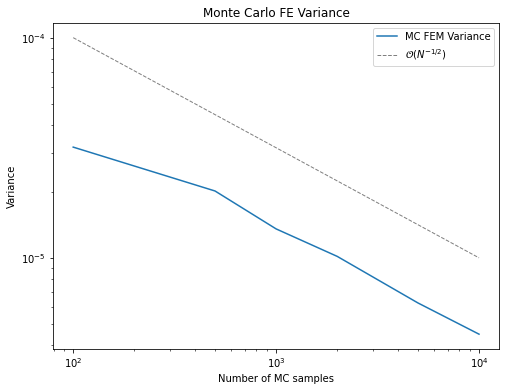

In [72]:
fnames = glob("./res_mc_b_*")

fe_mc_res = dict()
for file in fnames:
    n = int(file[11:-4])
    data = np.loadtxt(file)
    fe_mc_res[n] = np.var(data)/np.sqrt(n)

fe_mc_res = dict(sorted(fe_mc_res.items()))

fig = plt.figure(figsize=(8,6))

plt.loglog(fe_mc_res.keys(), 
             np.array(list(fe_mc_res.values())), 
             label="MC FEM Variance")

# Plot convergence rate
Ns = list(fe_mc_res.keys())
x0 = Ns[0]
x1 = Ns[-1]
y = lambda x : 0.001*x**-0.5
y0 = y(x0)
y1 = y(x1)    
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-1/2}})$")
plt.legend()
plt.title("Monte Carlo FE Variance")
plt.ylabel("Variance")
plt.xlabel("Number of MC samples")
plt.show()

We observe the expected rate.

### (d) {-}

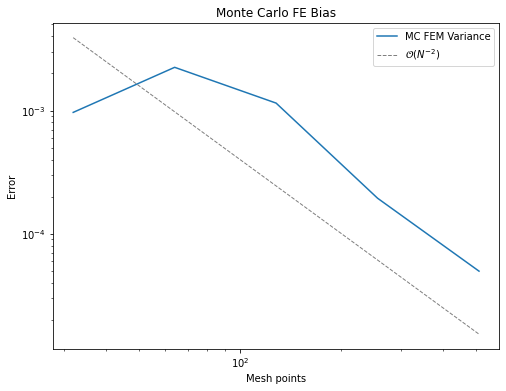

In [83]:
best_sol = np.mean(np.loadtxt("res_high_res.txt"))

fnames = glob("./res_mc_d_*")

fe_mc_err = dict()
for file in fnames:
    n = int(file[11:-4])
    data = np.loadtxt(file)
    fe_mc_err[n] = np.abs(np.mean(data) - best_sol)

fe_mc_err = dict(sorted(fe_mc_err.items()))

fig = plt.figure(figsize=(8,6))

plt.loglog(fe_mc_err.keys(), 
             np.array(list(fe_mc_err.values())), 
             label="MC FEM Variance")

# Plot convergence rate
Ns = list(fe_mc_err.keys())
x0 = Ns[0]
x1 = Ns[-1]
y = lambda x : 4*x**-2
y0 = y(x0)
y1 = y(x1)    
plt.loglog([x0,x1], [y0,y1], '--', color='gray', linewidth=1, label=f"$\mathcal{{O}}(N^{{-2}})$")
plt.legend()
plt.title("Monte Carlo FE Bias")
plt.ylabel("Error")
plt.xlabel("Mesh points")
plt.show()

We observe an asymptotic rate of almost $\mathcal{O}(N^{-2})$ which is faster than what we observed in the deterministic case.